**Define the necessary libraries**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler, MaxAbsScaler, Normalizer 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
import warnings 
warnings.filterwarnings("ignore") 

**Load the dataset into the dataframe**

In [2]:
df = pd.read_csv('BigmartSales.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Drop the "Item_Identifier" and "Outlet_Identifier" columns**

In [3]:
df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace = True)

**Extract the target labels**

In [4]:
Target_label =df['Item_Outlet_Sales']

**Replace the field "Item_Fat_Content" with numerical value**

In [5]:
df['Item_Fat_Content'].replace(['Low Fat','Regular','LF','reg','low fat'],
                        [0, 1,0,1,0], inplace=True)

In [6]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,1,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,0,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,0,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


**Perform ordinal encoding of the "Item_Type", "Outlet_Type", "Outlet_Location_Type" and "Outlet_Type" field**

In [7]:
oe = OrdinalEncoder()

In [8]:
col_encode = ['Item_Type', 'Outlet_Type', 'Outlet_Location_Type']

In [9]:
df[col_encode] = oe.fit_transform(df[col_encode])

In [10]:
df[col_encode]

,Item_Type,Outlet_Type,Outlet_Location_Type
0,4.0,1.0,0.0
1,14.0,2.0,2.0
2,10.0,1.0,0.0
3,6.0,0.0,2.0
4,9.0,1.0,2.0
...,...,...,...
8518,13.0,1.0,2.0
8519,0.0,1.0,1.0
8520,8.0,1.0,1.0
8521,13.0,2.0,2.0


**Imputation of "Outlet_Size" field with mode value**

In [11]:
df['Outlet_Size'].isnull().sum()

2410

In [12]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

In [13]:
df['Outlet_Size'].isnull().sum()

0

**Check for null values**

In [14]:
df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Imputation of "Item_Weight" field with mode value**

In [15]:
df['Item_Weight'].fillna(df['Item_Weight'].mode()[0],inplace=True)

In [16]:
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Display all field in the dataset using boxplot**

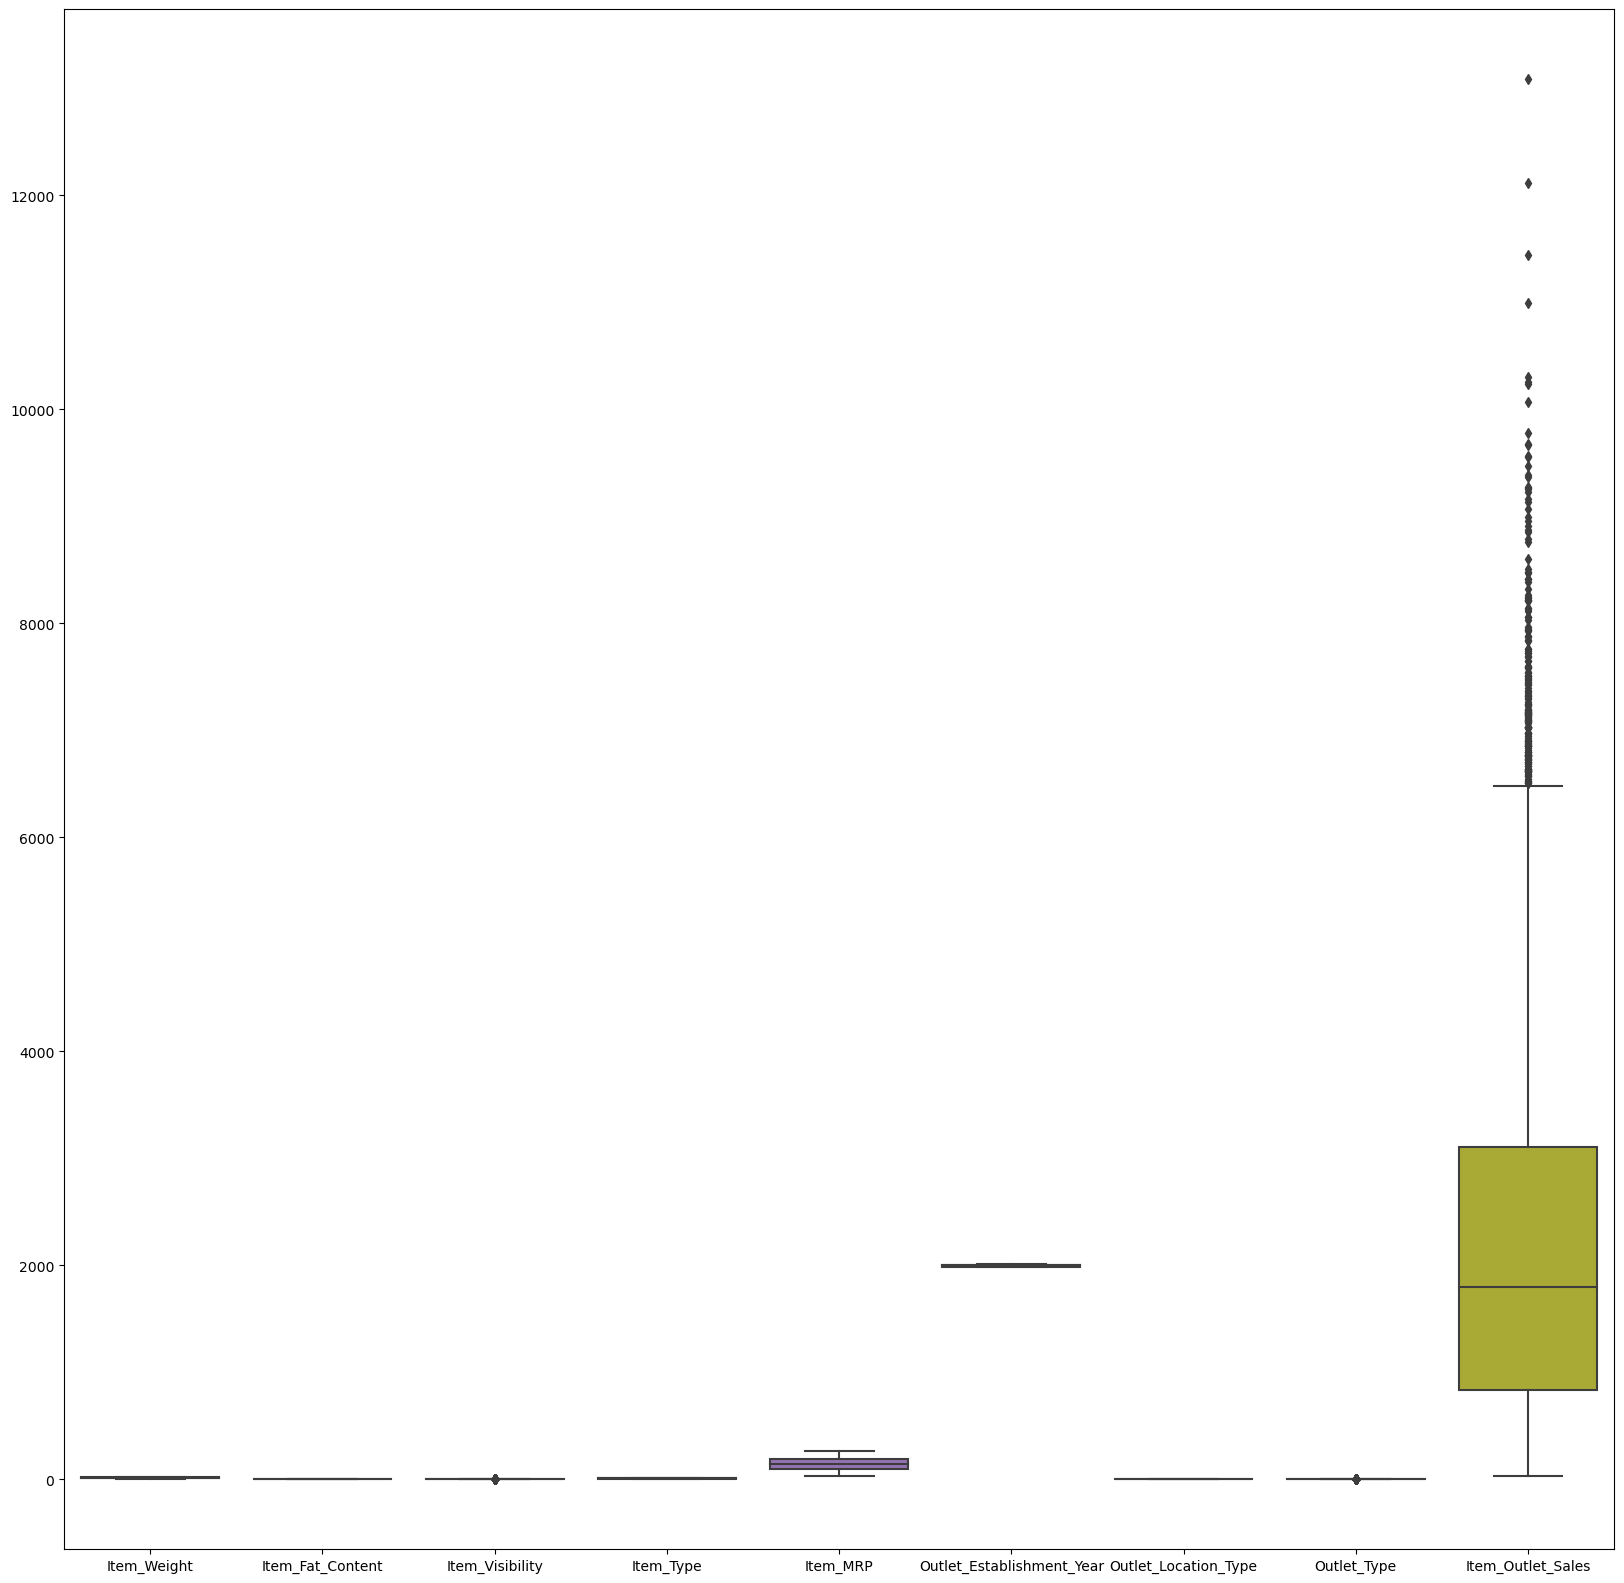

In [17]:
plt.figure(figsize=(20,20))
sns.boxplot(data=df)
plt.show()

**Split the dataset into train and test(20%), apply Linear Regression and calculate RMSE value**

In [18]:
df['Outlet_Size'].replace(['Small','Medium','High'],[0,1,2],inplace=True)
df['Outlet_Size'].value_counts()

1    5203
0    2388
2     932
Name: Outlet_Size, dtype: int64

In [19]:
def scaling(data, scaler_type="", scale_col=[]):
    scaler = scaler_type()
    df[scale_col] = scaler.fit_transform(df[scale_col])        
    return df

In [20]:
def train_test(df, test_size=0.2, col=""):
    
    x = df.drop(col,axis=1)
    y =df[col]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)    
    return x_train, x_test, y_train, y_test

In [21]:
def lin_model_rmse(x_train, x_test, y_train, y_test):
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    return rmse

**Apply StandardScaller and split the dataset into train and test(20%)**

In [22]:
scaling_columns = ["Item_Weight","Item_Visibility","Item_MRP","Item_Outlet_Sales"]

In [23]:
std_scaled_data = scaling(df.copy(),StandardScaler,scale_col=scaling_columns)

In [24]:
x_train, x_test, y_train, y_test = train_test(df=std_scaled_data, test_size=0.2,col="Item_Outlet_Sales")

**Display all field in the dataset using boxplot**

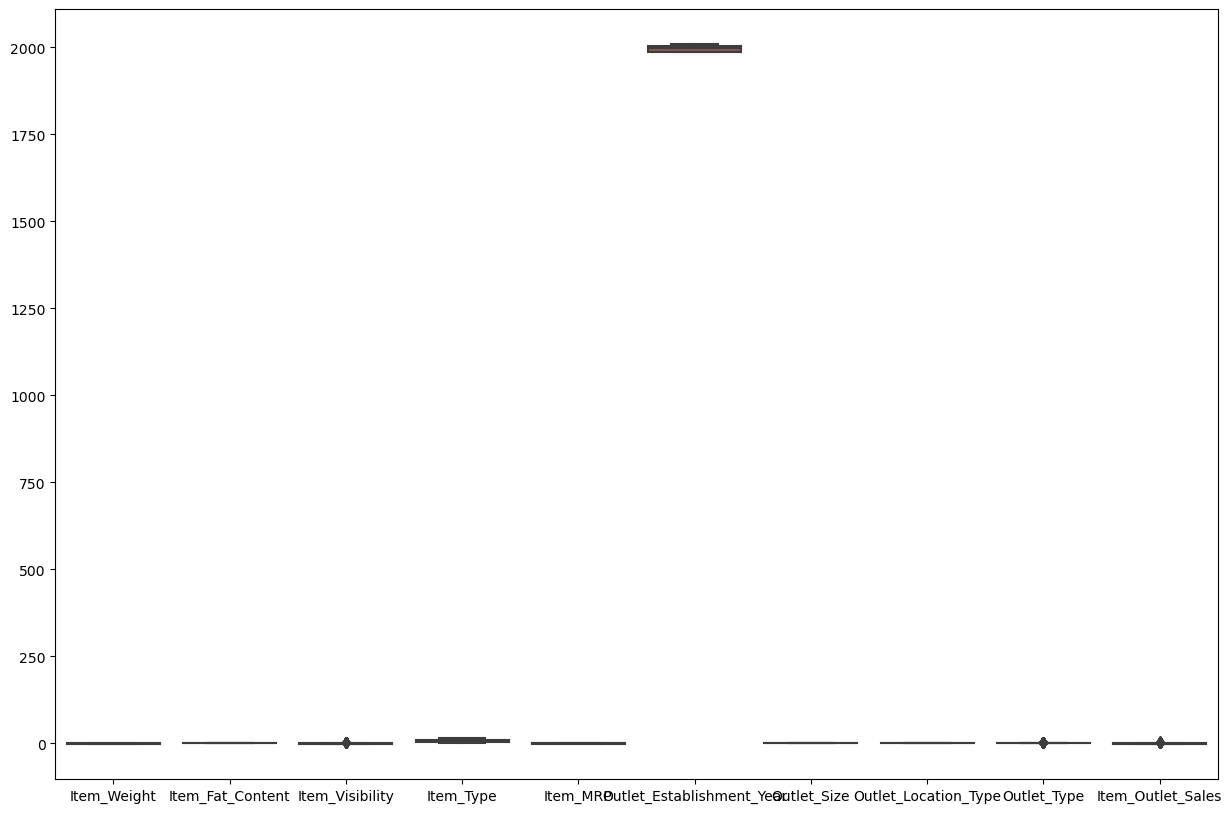

In [25]:
plt.figure(figsize=(15,10))
sns.boxplot(data=std_scaled_data)
plt.show()

**Apply Linear Regression and calculate RMSE value**

In [26]:
rmse_std = lin_model_rmse(x_train, x_test, y_train, y_test)
print("Standard Scaling - Root Mean Squared Error (RMSE) :", rmse_std)

Standard Scaling - Root Mean Squared Error (RMSE) : 0.6663781012572418


**Apply MinMaxScaler, split the dataset into train and test(20%), apply LinearRegression and calculate RMSE**

In [27]:
minmax_scaled_data = scaling(df.copy(),MinMaxScaler,scale_col=scaling_columns)

In [28]:
x_train, x_test, y_train, y_test = train_test(df=minmax_scaled_data, test_size=0.2,col="Item_Outlet_Sales")

In [29]:
rmse_min_max = lin_model_rmse(x_train, x_test, y_train, y_test)
print("Min Max Scaling - Root Mean Squared Error (RMSE) :", rmse_min_max)

Min Max Scaling - Root Mean Squared Error (RMSE) : 0.08711012623819253


**Apply RobustScaler,Split the dataset into train and test(20%), apply LinearRegression and calculate RMSE**

In [30]:
robust_scaled_data = scaling(df.copy(),RobustScaler,scale_col=scaling_columns)

In [31]:
x_train, x_test, y_train, y_test = train_test(df=robust_scaled_data,test_size=0.2,col="Item_Outlet_Sales")

In [32]:
rmse_robust = lin_model_rmse(x_train, x_test, y_train, y_test)
print("Robust Scaling - Root Mean Squared Error (RMSE) :", rmse_robust)

Robust Scaling - Root Mean Squared Error (RMSE) : 0.5015803627095455


**Apply MaxAbsScaler, split the dataset into train and test(20%), apply LinearRegression and calculate RMSE**

In [33]:
max_abs_scaled_data = scaling(df.copy(),MaxAbsScaler,scale_col=scaling_columns)

In [34]:
x_train, x_test, y_train, y_test = train_test(df=max_abs_scaled_data,test_size=0.2,col="Item_Outlet_Sales")

In [35]:
rmse_abs= lin_model_rmse(x_train, x_test, y_train, y_test)
print("Robust Scaling - Root Mean Squared Error (RMSE) :", rmse_abs)

Robust Scaling - Root Mean Squared Error (RMSE) : 0.10069460144012751


**Apply Normalizer, split the dataset into train and test(20%), apply LinearRegression and calculate RMSE**

In [37]:
normalizer_scaled_data = scaling(df.copy(),Normalizer,scale_col=scaling_columns)

In [38]:
x_train, x_test, y_train, y_test = train_test(df=normalizer_scaled_data,test_size=0.2,col="Item_Outlet_Sales")

In [39]:
rmse_norm= lin_model_rmse(x_train, x_test, y_train, y_test)
print("Normalizer - Root Mean Squared Error (RMSE) :", rmse_norm)

Normalizer - Root Mean Squared Error (RMSE) : 0.19758523443470924


**Define a function valuelabel to place the legend of each bar in the histogram**

In [40]:
def valuelabel(rect, ax):
    """
    Attach a text label above each bar in a histogram displaying its height.
    """
    for r in rect:
        height = r.get_height()
        ax.annotate(f'{height}',
                    xy=(r.get_x() + r.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

**Plot a histogram to display the RMSE value of each scaler**

In [43]:
hist = [rmse_std,rmse_min_max,rmse_robust,rmse_abs,rmse_norm]

In [44]:
hist1 = list(map(lambda x:round(x,3),hist))

In [45]:
Scaling_names = ["Standard-Scaler","MinMax-Scaler","Robust-Scaler","MaxAbs-Scaler","Normalizer-Scaler"]

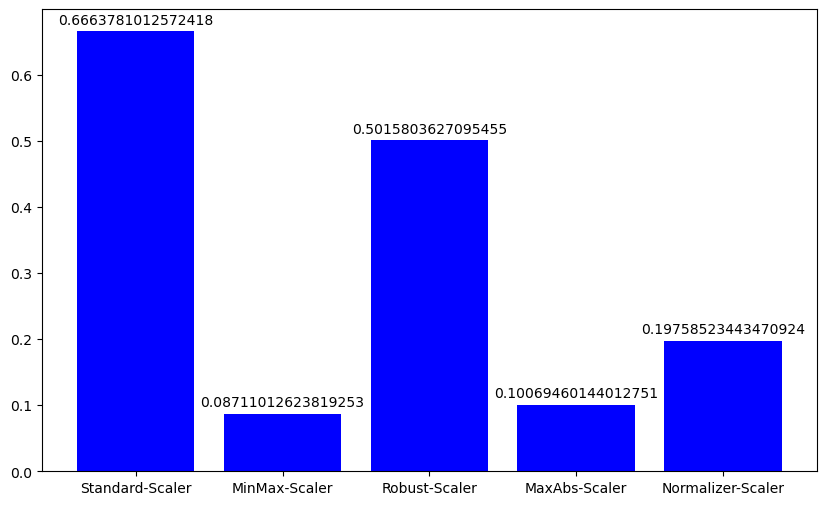

In [54]:
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(Scaling_names, hist,color="Blue")
valuelabel(bars, ax)
plt.show()
